In [5]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
from PIL import Image
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seed for reproducibility
manualSeed = 95
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  95


In [10]:
nb_epochs = 213
a = np.array([0.25, 0.5, 0.75, 1])
x = a*nb_epochs
x.astype(int)

array([ 53, 106, 159, 213])

In [2]:
name = "Pkmn_img"
def PNG_TO_JPEG(process_new = False):
    num=0      #adding a process_new to delete directory and process new images
    if os.path.isdir("data/data_ready") is True:
        
        print("Data is already processed..")
    else:
        os.mkdir("data/data_ready")
        for file in os.listdir("data/"): 
            if os.path.isdir("data/" + file):
                continue
            im = Image.open("data/" + file)
            if im.format == "JPEG":
                im.save(os.path.join("data/data_ready/" + name + str(num)) + ".jpg", 'JPEG')
                num+=1
            elif im.format == "PNG":
                fill_color = (255,255,255)
                im = im.convert("RGBA")
                if im.mode in ("RGBA", "LA"):
                    background = Image.new(im.mode[:-1], im.size, fill_color)
                    background.paste(im, im.split()[-1]) # omit transparency
                    im = background
                im.convert("RGB").save(os.path.join("data/data_ready/" + name + str(num)) + ".jpg", 'JPEG')
                num+=1
            else:
                print("Unknown image format...")

In [4]:
PNG_TO_JPEG()

In [2]:
# Root directory for dataset
dataroot = "D:/Documents/GitHub/GAN_pokemon/data"

# Number of workers for dataloader
workers = 2

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = (64,64)

ngpu = 1

In [4]:
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               #transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

In [5]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128,
                                         shuffle=True, num_workers=workers)

In [7]:
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

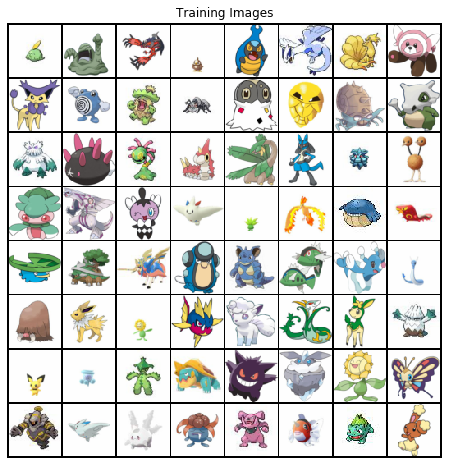

In [8]:
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [18]:
from torch.utils.tensorboard import SummaryWriter# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/pkmn_gan')

img_grid = vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu()
writer.add_image('pkmn_gan_img', img_grid)

ImportError: TensorBoard logging requires TensorBoard with Python summary writer installed. This should be available in 1.14 or above.

In [16]:
img_grid = vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu()
img_grid

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.0000,  ..., 1.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 1.0000,  ..., 1.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.0000,  ..., 1.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 1.0000,  ..., 1.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.0000,  ..., 1.0000, 0.0000, 0.

In [13]:
from torch.utils.tensorboard import SummaryWriter

ImportError: TensorBoard logging requires TensorBoard with Python summary writer installed. This should be available in 1.14 or above.